## predicting turbine energy yield (TEY) using ambient variables as features.

## Import libraries

In [4]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Generating reproducible results from same code
tf.random.set_seed(14) 

In [6]:
raw = pd.read_csv("G:\my Assignemt\Assigements 16 Neural network\gas_turbines.csv.crdownload")
raw.head() 
#TEY is the variable we should predict.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [7]:
df = raw.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5387 entries, 0 to 5386
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      5387 non-null   float64
 1   AP      5387 non-null   float64
 2   AH      5387 non-null   float64
 3   TEY     5386 non-null   float64
dtypes: float64(4)
memory usage: 168.5 KB


In [9]:
df.describe()

,AT,AP,AH,TEY
count,5387.000000,5387.000000,5387.000000,5386.000000
mean,19.344062,1011.626831,76.655156,133.097831
std,8.088147,6.450995,14.482346,15.590339
min,0.522300,985.850000,30.344000,102.560000
25%,12.342000,1007.900000,65.920000,124.590000
50%,20.683000,1011.100000,79.221000,133.780000
75%,25.678500,1015.000000,88.566500,135.180000
max,34.929000,1031.800000,100.180000,174.610000


# Feature Analysis

 All features in the dataset can be used in model building. This is a Regression Problem.

# Train | Split dataset

In [10]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

A common mistake when configuring a neural network is to first normalize the data before splitting the data.

In [11]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [13]:
len(xtrain_scale)

3770

# Neural Network Modelling

Building the Model

In [14]:
# Create your first MLP in Keras
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth



Epoch 1/100


17/17 [==============================] - 3s 45ms/step - loss: 0.1119 - mse: 0.1119 - mae: 0.2659 - val_loss: 0.0548 - val_mse: 0.0548 - val_mae: 0.1882
Epoch 2/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0534 - mse: 0.0534 - mae: 0.1793 - val_loss: 0.0490 - val_mse: 0.0490 - val_mae: 0.1679
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0481 - mse: 0.0481 - mae: 0.1622 - val_loss: 0.0477 - val_mse: 0.0477 - val_mae: 0.1525
Epoch 4/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0470 - mse: 0.0470 - mae: 0.1516 - val_loss: 0.0472 - val_mse: 0.0472 - val_mae: 0.1539
Epoch 5/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1533 - val_loss: 0.0472 - val_mse: 0.0472 - val_mae: 0.1499
Epoch 6/100
17/17 [==============================] - 0s 20ms/step - loss: 0.0468 - mse: 0.0468 - mae: 0.1519 - val_loss: 0.0470 - val_mse: 0.0470 - val_mae: 0.1498
Epoch 7/100


In [16]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Evaluation

In [17]:
y_predict = model1.predict(xtest_scale)

51/51 [==============================] - 0s 3ms/step


In [18]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [19]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038386,0.038386,0.151635,0.038274,0.038274,0.148811,95
96,0.038343,0.038343,0.150582,0.039099,0.039099,0.157303,96
97,0.038455,0.038455,0.151867,0.038757,0.038757,0.149357,97
98,0.038717,0.038717,0.152401,0.039626,0.039626,0.159259,98
99,0.038691,0.038691,0.152685,0.038479,0.038479,0.148556,99


# Visualize Training History

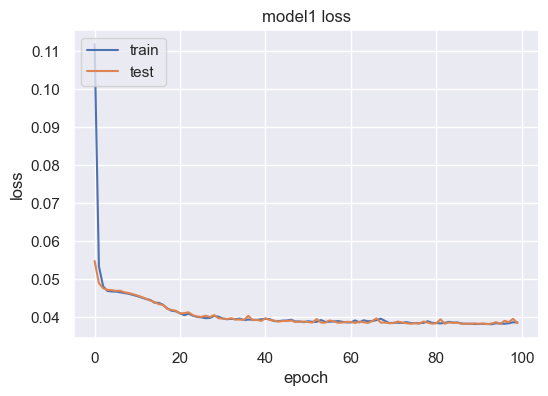

In [20]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

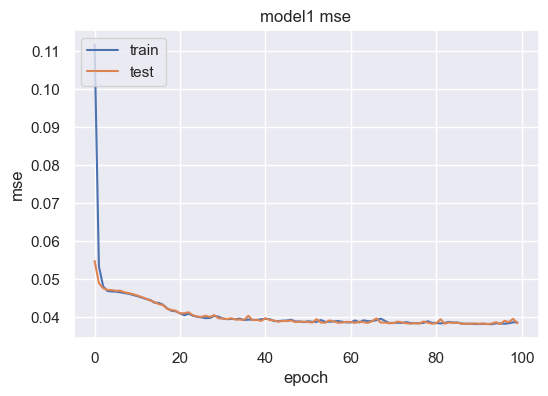

In [21]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 